# Binary classification problems

# February 13, 2023

Some most preferred algorithms are as follows:

Basic Models:

1. KNN Classifier
2. Logistic Regression
3. Support Vector Machine (SVM) 
4. Naive Bayes
5. Decision Tree

Ensemble Learning Models:

6. Bagging Decision Tree
7. Boosted Desision Tree
8. Random Forest
9. Voting Classifiers

Deep Learning Models:

10. Neural Networks [leave for later!]

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
data = pd.read_csv('data.csv')
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:title={'center':'Counts'}, xlabel='diagnosis', ylabel='count'>

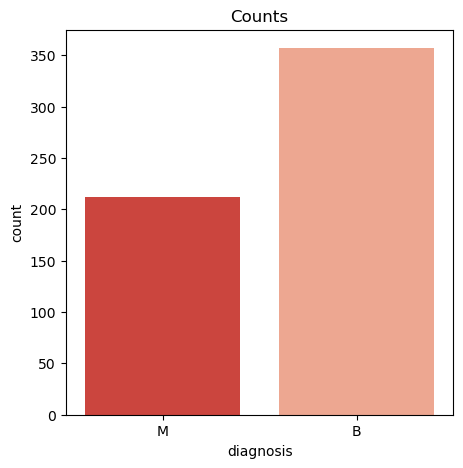

In [5]:
plt.figure(figsize=(5, 5))
plt.title('Counts')
sns.countplot(x=data['diagnosis'], palette='Reds_r')

In [6]:
le = LabelEncoder()
data.diagnosis = le.fit_transform(data.diagnosis)

In [7]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [8]:
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis']

In [9]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [10]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_1 = standardizer.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)

# KNN classifier 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

test_sc = []
train_sc = [] 
neighbors = []

for i in range (5, 30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    neighbors.append(i)
    test_sc.append(knn_model.score(X_test, y_test))
    train_sc.append(knn_model.score(X_train, y_train))

# train_sc[22], test_sc[22] 

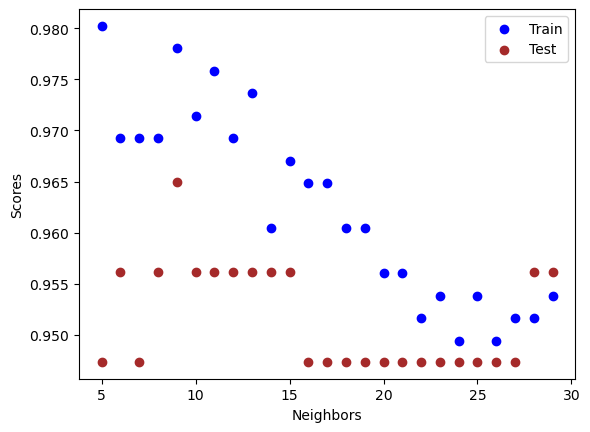

In [14]:
import matplotlib.pyplot as plt
plt.scatter(neighbors, train_sc, c = 'blue', label='Train')
plt.scatter(neighbors, test_sc, c = 'brown', label='Test')
plt.xlabel('Neighbors')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Logistic Regression 

In [15]:
# Importing Logstic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [16]:
print("Test score: " + str(model.score(X_test, y_test)))
print("Train score: "+ str(model.score(X_train, y_train)))

Test score: 0.9736842105263158
Train score: 0.9868131868131869


# SVM

In [17]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
print("Test score: " + str(svm_model.score(X_test, y_test)))
print("Train score: "+ str(svm_model.score(X_train, y_train)))

Test score: 0.956140350877193
Train score: 0.9868131868131869


# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)  

GaussianNB()

In [20]:
print("Test score: " + str(naive_model.score(X_test, y_test)))
print("Train score: "+ str(naive_model.score(X_train, y_train)))

Test score: 0.9649122807017544
Train score: 0.9362637362637363


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(criterion='entropy', random_state=34)
decision_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=34)

In [22]:
print("Test score: " + str(decision_model.score(X_test, y_test)))
print("Train score: "+ str(decision_model.score(X_train, y_train)))

Test score: 0.9473684210526315
Train score: 1.0


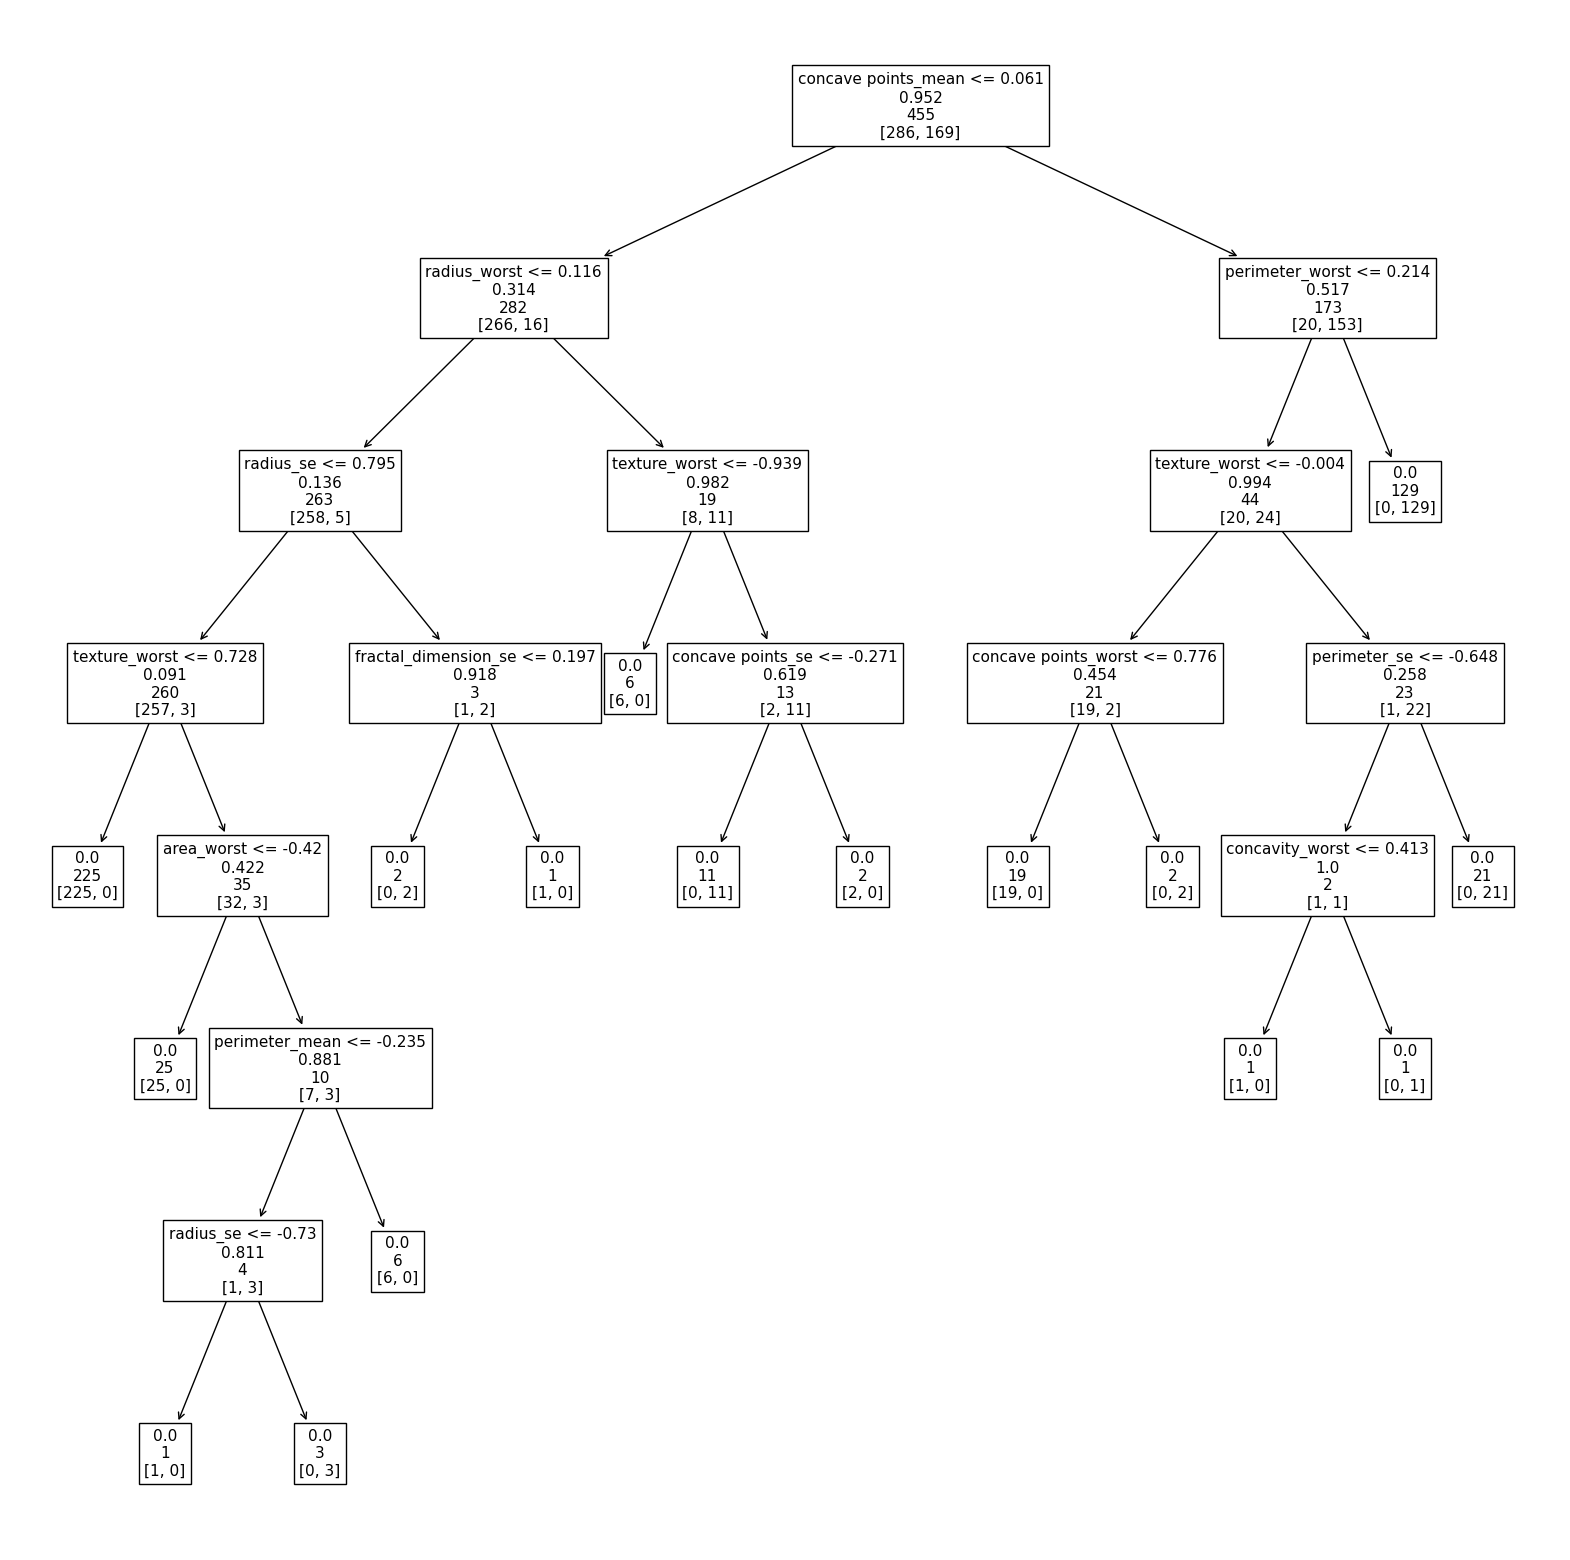

In [23]:
from sklearn.tree import plot_tree, export_text

text_rep = export_text(decision_model)

fig = plt.figure(figsize=(20,20))
graph = plot_tree(decision_model, feature_names=list(X.columns), 
                  label=list(np.unique(y)), filled=False, fontsize=11)

# Bagging Decision Tree

In [25]:
# Bagging on decision is done by creating bootstrap samples 
# and then trees on bootstrap samples and then aggregating the
# to predict the output.

from sklearn.ensemble import BaggingClassifier

bg_model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [26]:
print("Test Score: " + str(bg_model.score(X_test, y_test)))
print("Train Score: "+ str(bg_model.score(X_train, y_train)))

Test Score: 0.956140350877193
Train Score: 0.9934065934065934


# Boosting Decision Tree

In [27]:
from sklearn.ensemble import AdaBoostClassifier

adb_model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         min_samples_split=10),
                   learning_rate=0.6, n_estimators=10)

In [28]:
print("Test Score: " + str(adb_model.score(X_test, y_test)*100))
print("Train Score: "+ str(adb_model.score(X_train, y_train)*100))

Test Score: 95.6140350877193
Train Score: 100.0


# Random Forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=40, max_depth=10)
rf_model.fit(X_train, y_train)
 

RandomForestClassifier(max_depth=10, n_estimators=40)

In [30]:
print("Test Score: " + str(rf_model.score(X_test, y_test)*100))
print("Train Score: "+ str(rf_model.score(X_train, y_train)*100))

Test Score: 95.6140350877193
Train Score: 100.0


# Voting Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [35]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

Neural Network : 0.9736842105263158
LogisticRegression : 0.9736842105263158
ExtraTreesClassifier : 0.9736842105263158
DecisionTree : 0.9385964912280702
RandomForest : 0.9649122807017544
Naive Bayes : 0.9649122807017544
KNeighbours : 0.9473684210526315
SVM : 0.9736842105263158
AdaBoostClassifier : 0.9736842105263158
GradientBoostingClassifier:  0.956140350877193
XGB : 0.956140350877193
CatBoost : 0.9736842105263158


In [39]:
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = CatBoostClassifier(logging_level='Silent')
clf3 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[('ExTrees', clf1), ('CatBoost', clf2), ('LogReg', clf3)], voting='soft')
# Could do hard voting too, but let's set it aside for now. 
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [41]:
from sklearn.model_selection import cross_val_score
c = []
c.append(cross_val_score(clf1,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf2,X_train,y_train,scoring='accuracy',cv=10).mean()) 
c.append(cross_val_score(clf3,X_train,y_train,scoring='accuracy',cv=10).mean())
print(c)
# LR wins!

[0.9647342995169084, 0.9691304347826086, 0.9735748792270531]
